## Load Data

In [1]:
from sklearn.model_selection import train_test_split
import datasets_util as du

#train_catalog, _ = du.get_gz2(True)
#test_catalog, _ = du.get_gz2(False)

# pick a small amount of the full dataset, splitting for train/test
full_catalog, _ = du.get_full_gz2()
small_catalog = full_catalog.iloc[:50000,:]
train_catalog, test_catalog = train_test_split(small_catalog, test_size=0.2, random_state=1)

## Preprocess Data

In [2]:
import target_formatter as tgf

# Get encodings of y data
y_encoder = tgf.get_summary_encoder(train_catalog)
y_train, y_test = tgf.get_train_test_summary_enc(y_encoder, train_catalog, test_catalog)

In [3]:
target_image_size = 224

# create datasets from file paths & encoded y
train_ds = du.get_dataset(train_catalog["file_loc"], y_train, target_image_size)
test_ds = du.get_dataset(test_catalog["file_loc"], y_test, target_image_size)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


## Create CNN Model

In [4]:
# Import function from cnn_model.py
from cnn_model import create_cnn_model

# Define parameters
input_shape = (target_image_size, target_image_size, 3)
num_classes = y_train.shape[1]

# Create CNN model
model = create_cnn_model(input_shape, num_classes, c_layers=4, d_layers=2)

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

## Train Model

In [5]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10,
)

Epoch 1/10
313/313 [==============================] - 507s 2s/step - loss: 1.4951 - accuracy: 0.4033 - val_loss: 1.3999 - val_accuracy: 0.4742
Epoch 2/10
313/313 [==============================] - 496s 2s/step - loss: 1.2146 - accuracy: 0.5307 - val_loss: 1.0568 - val_accuracy: 0.5794
Epoch 3/10
313/313 [==============================] - 519s 2s/step - loss: 1.0214 - accuracy: 0.6266 - val_loss: 0.8709 - val_accuracy: 0.6824
Epoch 4/10
313/313 [==============================] - 507s 2s/step - loss: 0.8944 - accuracy: 0.6820 - val_loss: 0.8405 - val_accuracy: 0.6901
Epoch 5/10
313/313 [==============================] - 507s 2s/step - loss: 0.8317 - accuracy: 0.7053 - val_loss: 0.7693 - val_accuracy: 0.7169
Epoch 6/10
313/313 [==============================] - 505s 2s/step - loss: 0.7745 - accuracy: 0.7274 - val_loss: 0.7692 - val_accuracy: 0.7205
Epoch 7/10
313/313 [==============================] - 505s 2s/step - loss: 0.7327 - accuracy: 0.7424 - val_loss: 0.7696 - val_accuracy: 0.7270

## Evaluate Model

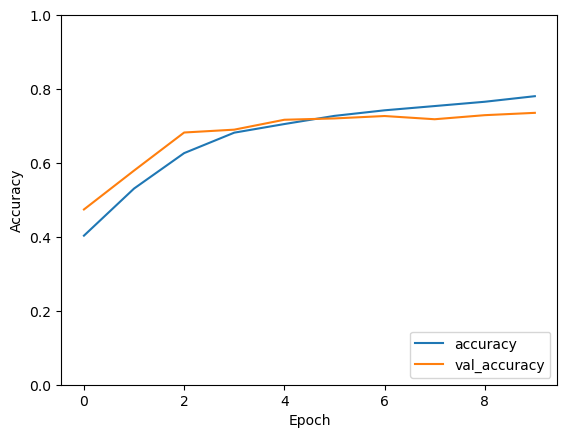

In [6]:
# Plot history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

## Saving Results

In [7]:
model.save("galaxy_classification_model.keras")

In [8]:
import pandas as pd

# save training history
hist_df = pd.DataFrame(history.history)
with open("galaxy_classification_training_history.csv", mode="w") as f:
    hist_df.to_csv(f)